In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.isnull().sum() 

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'] , inplace = True)

In [10]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Univariate Analysis

##### Categorical Column


In [11]:
df['Gender'].value_counts() 

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

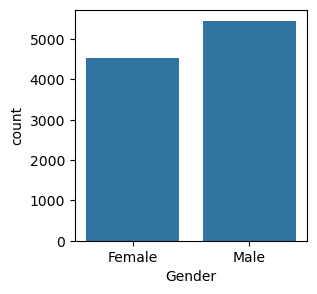

In [12]:
plt.figure(figsize=(3,3))
sns.countplot(x = df['Gender']) 

In [13]:
df['IsActiveMember'].value_counts() 

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

<Axes: xlabel='IsActiveMember', ylabel='count'>

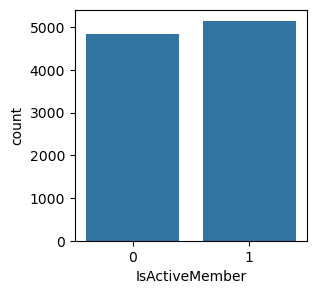

In [14]:
plt.figure(figsize=(3,3))
sns.countplot(x = df['IsActiveMember']) 

In [15]:
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

<Axes: xlabel='HasCrCard', ylabel='count'>

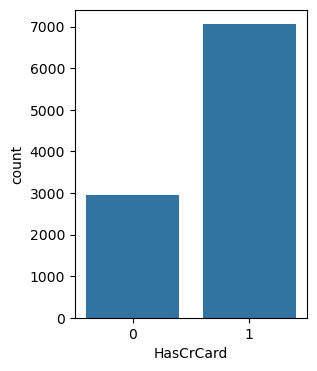

In [16]:
plt.figure(figsize = (3,4))
sns.countplot( x = df['HasCrCard'])

#### Bivariate Analysis

In [17]:
df['Geography'].value_counts() 

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

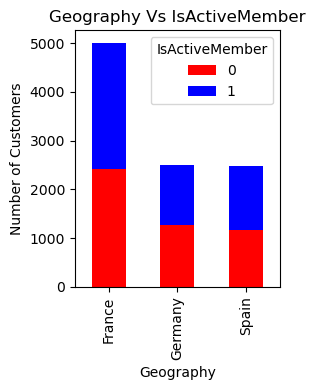

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = df.groupby(['Geography', 'IsActiveMember']).size().unstack() 
data.plot(kind='bar', stacked=True, figsize=(3, 4), color=['red', 'blue'])

plt.title('Geography Vs IsActiveMember')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='IsActiveMember') 
plt.tight_layout()
plt.show()


In [19]:
df.groupby('Geography')['IsActiveMember'].value_counts()

Geography  IsActiveMember
France     1                 2591
           0                 2423
Germany    0                 1261
           1                 1248
Spain      1                 1312
           0                 1165
Name: count, dtype: int64

In [20]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encode Categorical Variables

#### Label Encoding Gender (Binary Category)  

In [21]:
le = LabelEncoder() 
df['Gender'] = le.fit_transform(df['Gender'])

#### One Hot Encoding on Geography(Nominal Data)

In [22]:
df = pd.get_dummies(df, columns=['Geography'], drop_first = True)

### Train - Test Split

In [23]:
X = df.drop('Exited', axis = 1)
y = df['Exited'] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) 

### Feature Scaling

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

### Train Logistic Regression

In [26]:
log_model = LogisticRegression(random_state = 42, max_iter = 1000) 
log_model.fit(X_train_scaled, y_train) 

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred_log = log_model.predict(X_test_scaled) 

#### Evaluate the Model

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))

Accuracy: 0.811


In [29]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_log))

Confusion Matrix: [[1543   64]
 [ 314   79]]


In [30]:
print("Classification Report:", classification_report(y_test, y_pred_log))

Classification Report:               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### Random Forest 

#### Train the Model

In [31]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train, y_train)

<IPython.core.display.Javascript object>

RandomForestClassifier(random_state=42)

In [32]:
y_predict = rfc.predict(X_test)

### Evaluate the Model

In [33]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.866


In [34]:
print("Confusion Matrix:", confusion_matrix(y_test, y_predict))

Confusion Matrix: [[1552   55]
 [ 213  180]]


In [35]:
print("Classification Report:", classification_report(y_test, y_predict))

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.46      0.57       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



### Gradient Boosting

#### Train the Model

In [36]:
gradient_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, random_state = 42)
gradient_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [37]:
y_pred_gb = gradient_model.predict(X_test)

### Evaluate Gradinet Boosting

In [38]:
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.8675


In [39]:
print("Confusion Matrix:", confusion_matrix(y_test, y_pred_gb))

Confusion Matrix: [[1543   64]
 [ 201  192]]


In [40]:
print("Classification Report:", classification_report(y_test, y_pred_gb))

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

